In [1]:
import pandas as pd
import numpy as np
import tsplib95
from tqdm import trange
import copy

from map import Map
from anneal import SimAnneal
# from main import get_data, create_map

import matplotlib.pyplot as plt
%matplotlib inline
from time import strftime, localtime


# Check for best

In [ ]:
all_numbers = []
for i in trange(30):
    SA = SimAnneal(type="a280",
                T0=20,
                sched=1,
                chain_length=500,
                method=4)
    output_df = SA.run(Nmax=int(10000))
    number = SA.Map.calculate_tour_length(SA.Map.make_edges_of_tour(SA.Map.nodes))
    all_numbers.append(number)
print(all_numbers)

In [7]:
print(round(np.mean(all_numbers), 2))
print(round(np.std(all_numbers), 2))
c, d = st.t.interval(0.95, len(all_numbers)-1, loc=np.mean(all_numbers), scale=st.sem(all_numbers))
print(round(c, 2), round(d, 2), '\n')

[2716.0, 2900.0, 2825.0, 2818.0, 2736.0, 2754.0]

In [8]:
SA.Map.calculate_tour_length(SA.Map.make_edges_of_tour(SA.Map.optimal_tour))

2579.0

# Check for T0s
T0 = []

In [18]:
# Different methods

T0s = [10, 20, 30, 40, 50]

best_T0 = {'param': None,
           'route': None,
           'score': np.inf}
all_means = []
all_data = {}
for i in trange(30):
    bests = []
    for T0 in T0s:
        SA = SimAnneal(type="a280",
                        T0=T0,
                        sched=1,
                        chain_length=50,
                        method=4)
        output_df = SA.run(Nmax=int(10000))
        new_score = SA.Map.calculate_tour_length(SA.Map.make_edges_of_tour(SA.Map.nodes))
        if new_score < best_T0['score']:
            best_T0['param'] = SA
            best_T0['route'] = SA.Map.nodes
            best_T0['score'] = new_score
        bests.append(np.min(output_df['Distances']))
        all_data[f'T{T0}_iteration{i}'] = output_df['Distances']
    all_means.append(bests)
_ = pd.DataFrame(all_means, columns=[f"T0={i}" for i in T0s])
_.to_csv(f'results/{strftime("%y_%m_%d_%H_%M_%S", localtime())}_T0s.csv', index=False)

100%|██████████| 30/30 [2:09:31<00:00, 259.06s/it]  


In [20]:
extra = pd.DataFrame(all_data)
extra.to_csv('results/all_data_sched1.csv')

# Check for multiple Swapping methods

1 => 1 node

2 => 2 nodes

3 => N sequential nodes

4 => Combined


In [22]:
# Different methods

methods = [1,2,3,4]

best_method = {'param': None,
           'route': None,
           'score': np.inf}
all_means = []
all_data = {}
for i in trange(30):
    bests = []
    for method in methods:
        SA = SimAnneal(type="a280",
                        T0=20,
                        sched=1,
                        chain_length=50,
                        method=method)
        output_df = SA.run(Nmax=int(10000))
        new_score = SA.Map.calculate_tour_length(SA.Map.make_edges_of_tour(SA.Map.nodes))
        if new_score < best_method['score']:
            best_method['param'] = SA
            best_method['route'] = SA.Map.nodes
            best_method['score'] = new_score
        bests.append(np.min(output_df['Distances']))
        all_data[f'T{method}_iteration{i}'] = output_df['Distances']
    all_means.append(bests)
_ = pd.DataFrame(all_means, columns=[f"Method={i}" for i in methods])
_.to_csv(f'results/{strftime("%y_%m_%d_%H_%M_%S", localtime())}_Methods.csv', index=False)

100%|██████████| 30/30 [1:38:43<00:00, 197.44s/it]


# Check for chain length

In [2]:
# Different ChainLenghts
ChainLengths = [1, 50, 100, 200, 500]

chains = [1,50,200,500]

best_chain = {'param': None,
           'route': None,
           'score': np.inf}
all_means = []
all_data = {}
for i in trange(10):
    bests = []
    for chain in chains:
        SA = SimAnneal(type="a280",
                        T0=20,
                        sched=1,
                        chain_length=chain,
                        method=4)
        output_df = SA.run(Nmax=int(10000))
        new_score = SA.Map.calculate_tour_length(SA.Map.make_edges_of_tour(SA.Map.nodes))
        if new_score < best_chain['score']:
            best_chain['param'] = SA
            best_chain['route'] = SA.Map.nodes
            best_chain['score'] = new_score
        bests.append(np.min(output_df['Distances']))
        all_data[f'T{chain}_iteration{i}'] = output_df['Distances']
    all_means.append(bests)
_ = pd.DataFrame(all_means, columns=[f"Chainlength={i}" for i in chains])
_.to_csv(f'results/{strftime("%y_%m_%d_%H_%M_%S", localtime())}_Chains.csv', index=False)

 10%|█         | 1/10 [14:58<2:14:44, 898.25s/it]c:\Users\skuil\Documents\Sam\Studie\Master Computational Science\Stochastic Simulation\StochasticSimulation\Assignment3\anneal.py:96: RuntimeWarning: overflow encountered in exp
  p = np.exp(-(new_distance - self.output_data['Distances'][-1])/T)
100%|██████████| 10/10 [2:21:43<00:00, 850.40s/it] 


# Check for cooling schedules

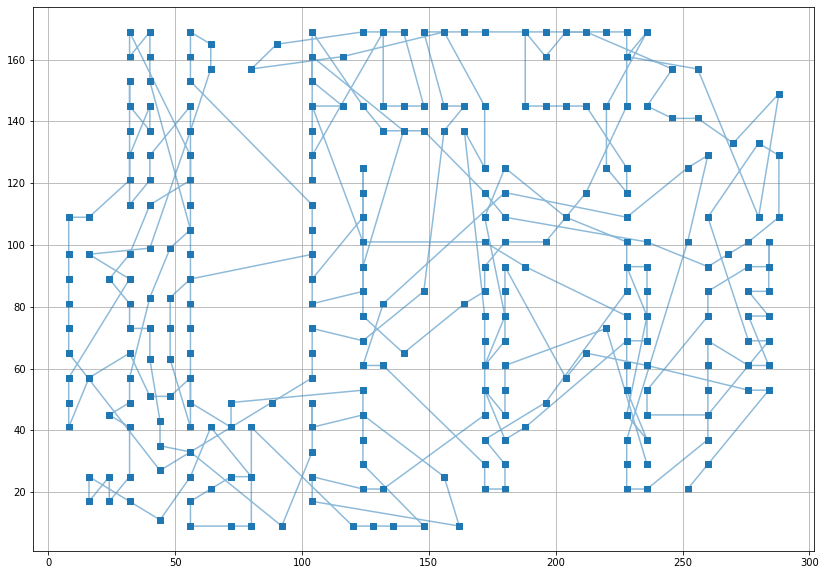

Tour length:  5499.0


No Error

In [14]:
# Different cooling schedules
CoolingSchedules = [1, 2]

best_schedule = {'param': None,
            'route': None,
            'score': np.inf}
all_means = []
for i in trange(30):
    means = []
    for schedule in CoolingSchedules:
        SA = SimAnneal(type="a280",
                        T0=10,
                        sched=schedule,
                        chain_length=50,
                        method=4)
        output_df = SA.run(Nmax=int(10000))
        new_score = SA.Map.calculate_tour_length(SA.Map.make_edges_of_tour(SA.Map.nodes))
        if new_score < best_schedule['score']:
            best_schedule['param'] = SA
            best_schedule['route'] = SA.Map.nodes
            best_schedule['score'] = new_score
        means.append(np.mean(output_df['Distances']))
    all_means.append(means)
_ = pd.DataFrame(all_means, columns=[f"Schedule={i}" for i in schedule])
_.to_csv('Schedules.csv', index=False)